In [78]:
from prelim_calculations import Calculate
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import csv
from demand_calculation import *
import os

start_day = 8
end_day = 14

seconds_calculated_over = (end_day - start_day) * 24 * 60 * 60

start_date = datetime.datetime(2023, 2, 8, 0, 0).timetuple()
end_date = datetime.datetime(2023, 2, 14, 0, 0).timetuple()

rti_ids = [["47072", "47073", "47068", "47061"], ["47707", "47722", "47711"], ["45623"], ["46494"], ["46640", "46641"], 
           ["46131"], ["52250", "44809", "44811", "48758", "48759", "48760", "48761"], 
           ["46367", "46359", "46362", "46365", "46366"], ["45626", "45625", "45639"]]

itr_ids = [["47123", "47124", "47119", "47112"], ["47851", "47866", "47855"], ["45791"], ["46539"], ["46682", "46683"], 
           ["46074"], ["44896", "44898", "48803", "48804", "48805", "48806", "52256"], 
           ["46404", "46407", "46410", "46411", "46412"], ["45794", "45793", "45807"]]

switches = ["MHI", "SMO", "LSGR", "BLO", "COR", "CAMUS", "PHONE", "BCO", "SSH"]

Zabbix Credentials Accepted.


Text(0, 0.5, 'Total Traffic from internet \nto switch over 7 days /Mb')

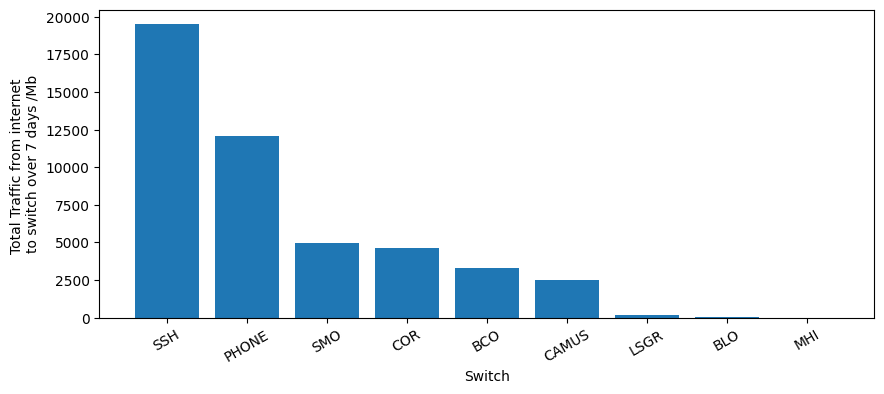

In [79]:
calc = Calculate()
token = calc.get_auth_token()
fig, ax = plt.subplots(figsize=(10,4))

data_values = [calc.build_request(itr_ids[i], token, start_date, end_date, False).values() for i in range(9)]

bars = pd.Series([int(sum(list(data_values[i]))) for i in range(9)], index=switches)
df = pd.DataFrame(bars, columns=['traffic'])
df = df.sort_values(by='traffic', ascending=False)

ax.bar(x=df.index, height=df['traffic'])

plt.xticks(rotation=30)
plt.xlabel("Switch")
plt.ylabel("Total Traffic from internet \nto switch over 7 days /Mb")

In [80]:
# Retrieve Data for total traffic through MHI and SMO

calc = Calculate()

# Order is INT->MHI, MHI->INT, INT->SMO, SMO->INT
ids = ["47067","47118","47708","47852"]
token = calc.get_auth_token()

int_to_mhi = calc.build_request("47067", token, start_date, end_date, True)
mhi_to_int = calc.build_request("47118", token, start_date, end_date, True)
int_to_smo = calc.build_request("47708", token, start_date, end_date, True)
smo_to_int = calc.build_request("47852", token, start_date, end_date, True)


Zabbix Credentials Accepted.


Text(0.5, 1.0, 'Traffic from Tegola to HUBS')

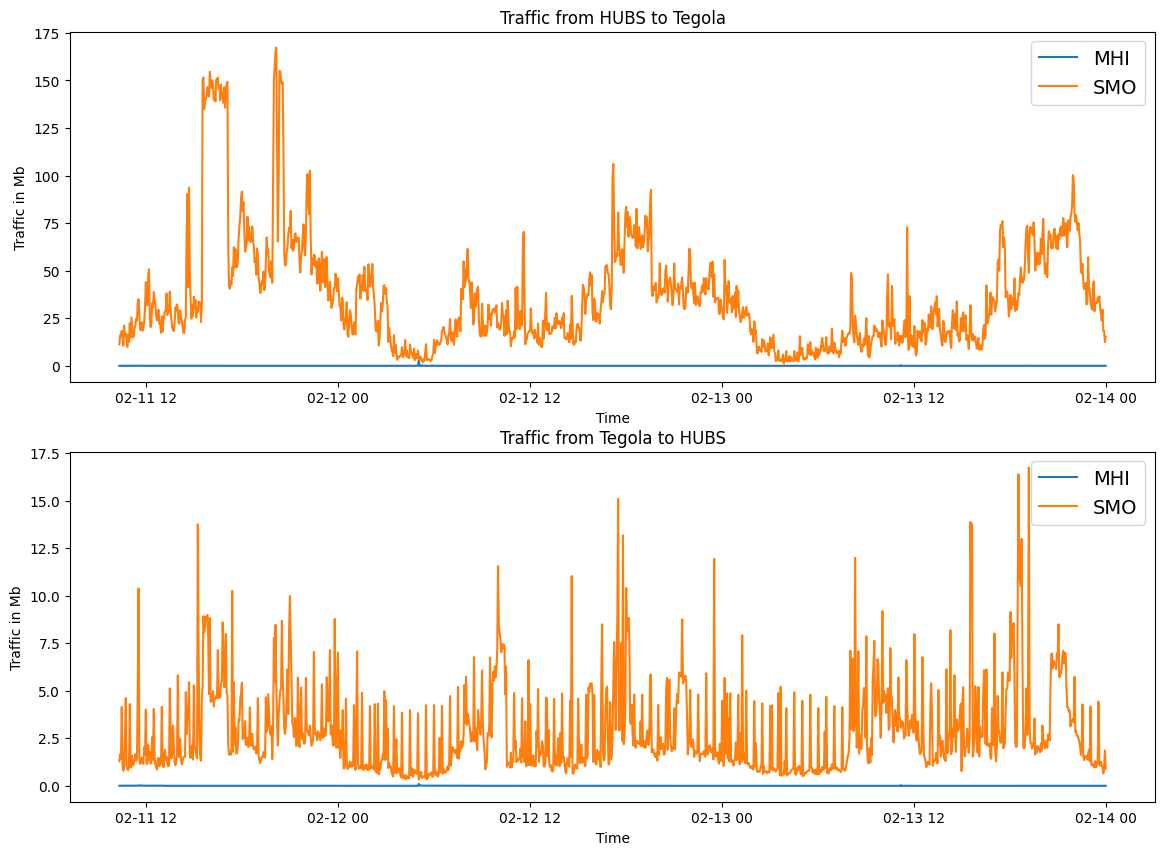

In [81]:
# Plot data for traffic between MHI and SMO for both upstream and downstream

fig, ax = plt.subplots(2, 1, figsize=(14,10))
ax[0].plot(int_to_mhi.keys(),int_to_mhi.values())
ax[0].plot(int_to_smo.keys(),int_to_smo.values())

ax[1].plot(mhi_to_int.keys(), mhi_to_int.values())
ax[1].plot(smo_to_int.keys(), smo_to_int.values())

ax[0].legend(["MHI", "SMO"],fontsize=14)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Traffic in Mb")
ax[0].set_title("Traffic from HUBS to Tegola")

ax[1].legend(["MHI", "SMO"],fontsize=14)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Traffic in Mb")
ax[1].set_title("Traffic from Tegola to HUBS")

In [82]:
# Preliminary Variables for the Utilization Graph

links = ["mhi-blo", "mhi-cor", "cor-phone", "cor-ssh", "blo-bco", "bco-usgr", "smo-usgr", "smo-camus", "usgr-cor", "usgr-ssh", "ssh-lsgr", "ssh-phonebox"]

link_capacities = [138.24, 147.05, 1000, 1000, 1000, 291.84, 583.68, 147.05, 147.05, 1000, 1000, 1000]

zabbix_link_ids = [["47070", "47121"], ["47065", "47116"], ["44804", "44891"], ["45645", "45813"], ["46493", "46538"], ["46358", "46403"], ["48183", "48243"], ["46074", "46131"], ["48184", "48244"], ["45624", "45792"], ["45623", "45791"], ["44805", "44892"]]

start_1 = datetime.datetime(2023, 2, 7, 18, 0).timetuple()
end_1 = datetime.datetime(2023, 2, 7, 23, 59).timetuple()

start_2 = datetime.datetime(2023, 2, 8, 18, 0).timetuple()
end_2 = datetime.datetime(2023, 2, 8, 23, 59).timetuple()

start_3 = datetime.datetime(2023, 2, 9, 18, 0).timetuple()
end_3 = datetime.datetime(2023, 2, 9, 23, 59).timetuple()

start_4 = datetime.datetime(2023, 2, 10, 18, 0).timetuple()
end_4 = datetime.datetime(2023, 2, 10, 23, 59).timetuple()

start_5 = datetime.datetime(2023, 2, 11, 18, 0).timetuple()
end_5 = datetime.datetime(2023, 2, 11, 23, 59).timetuple()

start_6 = datetime.datetime(2023, 2, 12, 18, 0).timetuple()
end_6 = datetime.datetime(2023, 2, 12, 23, 59).timetuple()

start_7 = datetime.datetime(2023, 2, 13, 18, 0).timetuple()
end_7 = datetime.datetime(2023, 2, 13, 23, 59).timetuple()

dates = ['07-02', '08-02', '09-02','10-02','11-02', '12-02', '13-02']
start_times = [start_1, start_2, start_3, start_4, start_5, start_6, start_7]
end_times = [end_1, end_2, end_3, end_4, end_5, end_6, end_7]


Zabbix Credentials Accepted.


Text(0.5, 1.0, 'Average Link Utilization During Peak Times (18:00-23:59)')

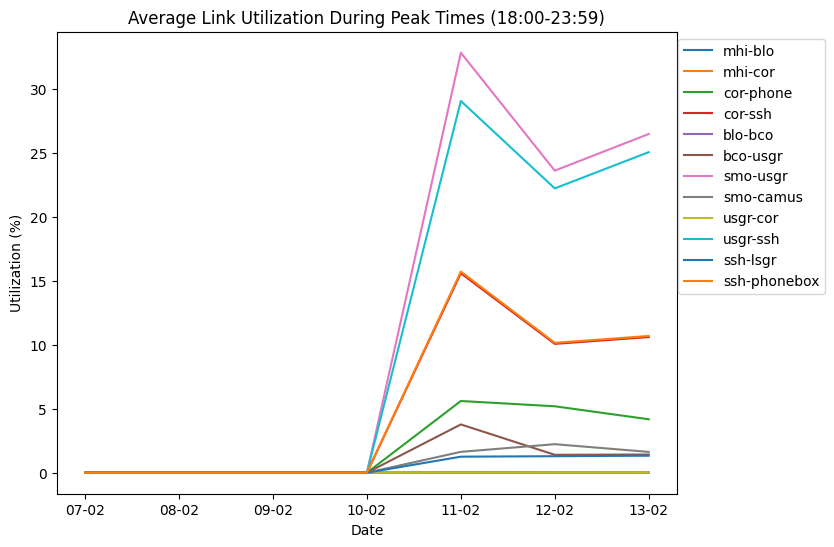

In [83]:
# Build the Utilization Graph

fig, ax = plt.subplots(1, 1, figsize=(8,6))
daily_values = []
calc = Calculate()
token = calc.get_auth_token()

# For each link (id_set) get the average utilization between 18:00 and 23:59 for each specified day
for id_set in zabbix_link_ids:
    for i in range(int(len(start_times))):
        data = calc.build_request(id_set, token, start_times[i], end_times[i], False)
        daily_value = (sum(list(data.values())) / 21600) * 100
        daily_values.append(daily_value)

# Plot the Util Values
for i in range(12):
    link_values = daily_values[(7*i) : 7*(i+1)]
    ax.plot(dates, link_values)

ax.legend(links,fontsize=10, bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))
ax.set_xlabel("Date")
ax.set_ylabel("Utilization (%)")
ax.set_title("Average Link Utilization During Peak Times (18:00-23:59)")

In [84]:
def get_demands_for_interval(calc, token, start_month, start_day, start_hour, start_minute, end_month, end_day, end_hour, end_minute):
    start_date = datetime.datetime(2023, start_month, start_day, start_hour, start_minute).timetuple()
    end_date = datetime.datetime(2023, end_month, end_day, end_hour, end_minute).timetuple()

    itr_values = [calc.build_request(itr_ids[i], token, start_date, end_date, False).values() for i in range(9)]
    rti_values = [calc.build_request(rti_ids[i], token, start_date, end_date, False).values() for i in range(9)]

    itr = [int(sum(list(itr_values[i]))) for i in range(9)]
    rti = [int(sum(list(rti_values[i]))) for i in range(9)]

    demands = [[0 for i in range(12)] for j in range(12)]

    for i in range(9):
        if i == 0 or i == 3:
            demands[i][10] = rti[i]
            demands[10][i] = itr[i]
        else:
            demands[i][11] = rti[i]
            demands[11][i] = itr[i]

    demands = split_improved(demands, 0.3)
    return demands

In [89]:
calc = Calculate()
token = calc.get_auth_token()


demands = []
day_intervals = np.arange(12, 18, 1)
hour_intervals = np.arange(18, 24, 1)
minute_intervals = np.arange(0, 57, 3)

os.remove("C:/Users/Jack5/Desktop/tegola/cloud_te_tutorial/data/b4/demand.txt")

for day in day_intervals:
    for hour in hour_intervals:
        for minute in minute_intervals:
            demands.append(get_demands_for_interval(calc, token, 2, day, hour, minute, 2, day, hour, minute + 3))

file = open("C:/Users/Jack5/Desktop/tegola/cloud_te_tutorial/data/b4/demand.txt", "w")

for demand_list in demands:
    for i in range(12):
        for j in range(12):
            file.write(str(demand_list[i][j]) + " ")
    file.write("\n")

file.close()

Zabbix Credentials Accepted.
total traffic: 96
total traffic: 83
total traffic: 83
total traffic: 83
total traffic: 84
total traffic: 83
total traffic: 72
total traffic: 75
total traffic: 71
total traffic: 69
total traffic: 81
total traffic: 75
total traffic: 64
total traffic: 83
total traffic: 69
total traffic: 69
total traffic: 80
total traffic: 70
total traffic: 65
total traffic: 72
total traffic: 66
total traffic: 66
total traffic: 73
total traffic: 79
total traffic: 77
total traffic: 79
total traffic: 67
total traffic: 69
total traffic: 71
total traffic: 93
total traffic: 101
total traffic: 42
total traffic: 39
total traffic: 44
total traffic: 42
total traffic: 43
total traffic: 46
total traffic: 34
total traffic: 41
total traffic: 40
total traffic: 57
total traffic: 40
total traffic: 34
total traffic: 33
total traffic: 40
total traffic: 38
total traffic: 35
total traffic: 48
total traffic: 53
total traffic: 44
total traffic: 31
total traffic: 39
total traffic: 48
total traffic: 4